<a href="https://colab.research.google.com/github/mosalama232/CW/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
#DATA PREPROCESSING
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [66]:
dataset=pd.read_csv("Final ML Dataset.csv")
dataset.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,predicted_category,sentiment,appVersion
0,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,woww,5,0,NaN,8/16/2022 5:55,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN
1,4bbf741b-2f69-43cd-bb76-f9b5f84c83b5,let me know more details about this,3,0,4.5.1143533,8/16/2022 4:44,NaN,NaN,CONTENT,NEUTRAL,NaN
2,3cb1136d-e7c6-4999-aa84-fdc7bcdccf56,i've been using this for a while and there's a...,2,0,4.5.1143533,8/16/2022 4:05,NaN,NaN,INTERFACE,NEGATIVE,NaN
3,d6f80f05-a6e8-44f3-a380-7c59ed3d208b,good,2,0,4.5.1143533,8/16/2022 0:22,NaN,NaN,USER_EXPERIENCE,POSITIVE,NaN
4,eecb277c-c658-4b2d-86c9-77d3a7022cac,mjkobe,5,0,4.5.1143533,8/15/2022 20:08,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN


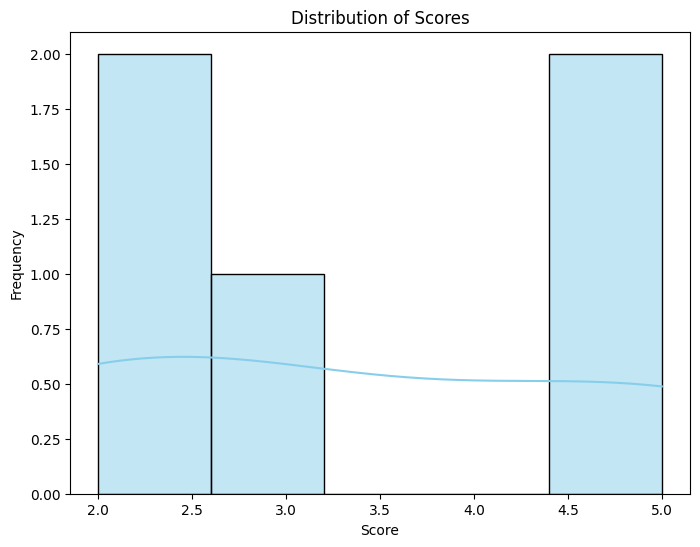

In [182]:
# Plot distribution of scores
plt.figure(figsize=(8, 6))
sns.histplot(df['score'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

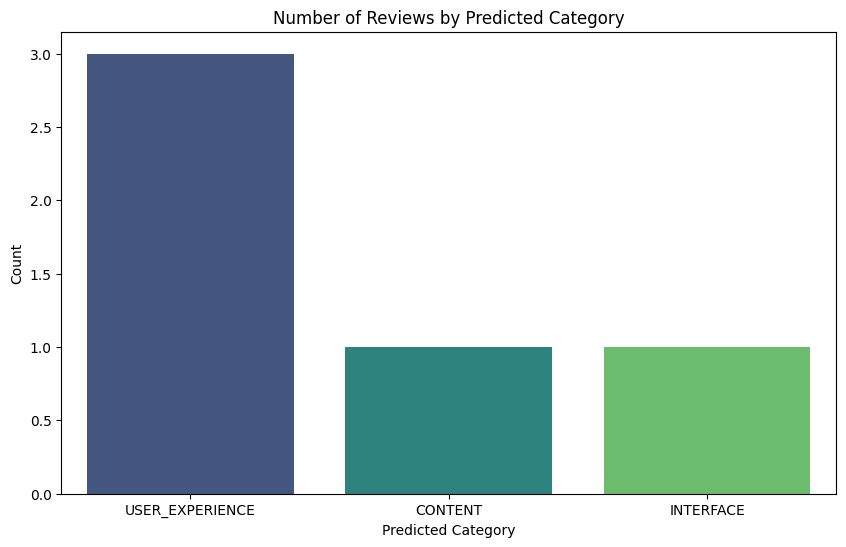

In [183]:
# Plot number of reviews by predicted category
plt.figure(figsize=(10, 6))
sns.countplot(x='predicted_category', data=df, palette='viridis')
plt.title('Number of Reviews by Predicted Category')
plt.xlabel('Predicted Category')
plt.ylabel('Count')
plt.show()


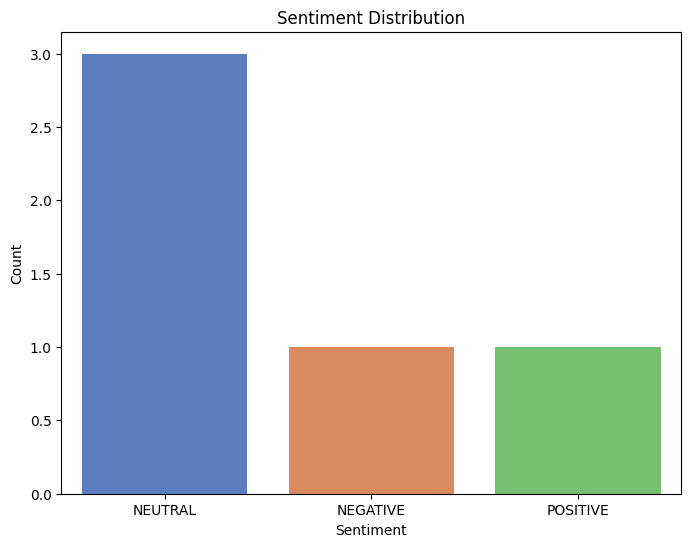

In [184]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='muted')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


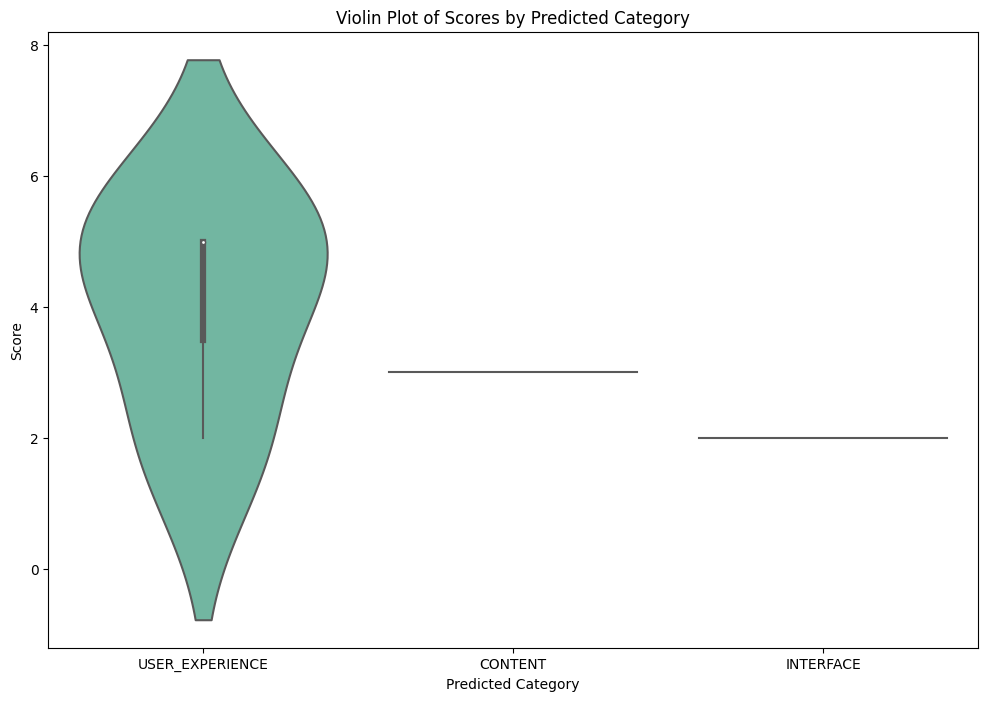

In [187]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='predicted_category', y='score', data=df, palette='Set2')
plt.title('Violin Plot of Scores by Predicted Category')
plt.xlabel('Predicted Category')
plt.ylabel('Score')
plt.show()

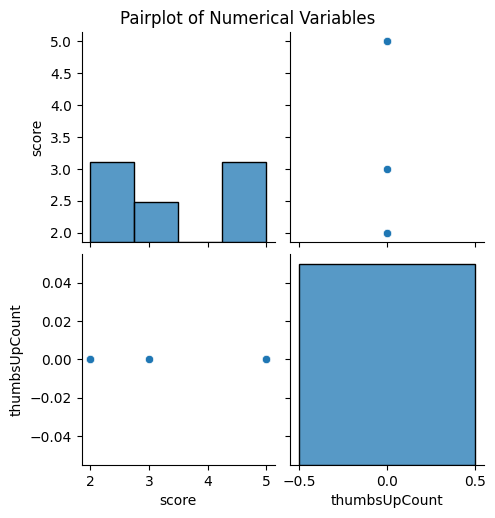

In [188]:


# Select numerical columns for the pairplot
numerical_columns = ['score', 'thumbsUpCount']

# Create pairplot
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


In [119]:
dataset.isna().sum()

content               0
score                 0
thumbsUpCount         0
predicted_category    0
sentiment             0
dtype: int64

In [120]:
x=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values

In [121]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [114]:
from sklearn.preprocessing import LabelEncoder
# Columns to encode
columns_to_encode = ['content', 'predicted_category', 'sentiment']
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode specified columns
for column in columns_to_encode:
    dataset[column] = label_encoder.fit_transform(dataset[column])

In [123]:
dataset

,content,score,thumbsUpCount,predicted_category,sentiment
0,38973,5,0,3,1
1,22566,3,0,0,1
2,18188,2,0,1,0
3,8834,2,0,3,2
4,25435,5,0,3,1
...,...,...,...,...,...
51531,17257,5,0,3,2
51532,27203,1,0,2,1
51533,8834,5,0,3,2
51534,2310,5,0,3,1


In [153]:
logreg_model = LogisticRegression()


In [173]:
logreg_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred2 = logreg_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred2)

# Display results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_result)

Accuracy: 0.1384361660845945

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.33      0.46      1188
           1       0.28      0.02      0.03      1427
           2       0.79      0.99      0.88      7693

    accuracy                           0.78     10308
   macro avg       0.61      0.44      0.45     10308
weighted avg       0.71      0.78      0.71     10308



Accuracy: 0.1384361660845945

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.33      0.46      1188
           1       0.28      0.02      0.03      1427
           2       0.79      0.99      0.88      7693

    accuracy                           0.78     10308
   macro avg       0.61      0.44      0.45     10308
weighted avg       0.71      0.78      0.71     10308


Confusion Matrix:
 [[   0 1188    0]
 [   0 1427    0]
 [   0 7693    0]]


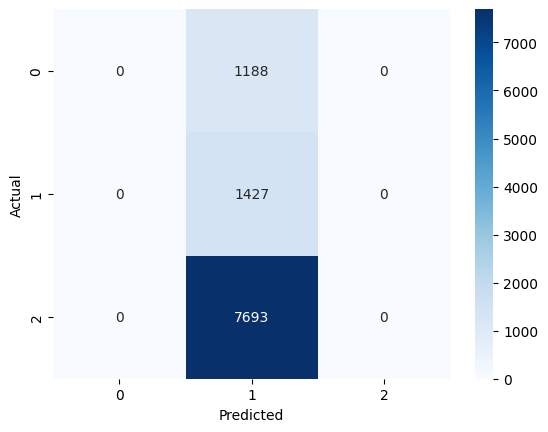

In [174]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_result)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

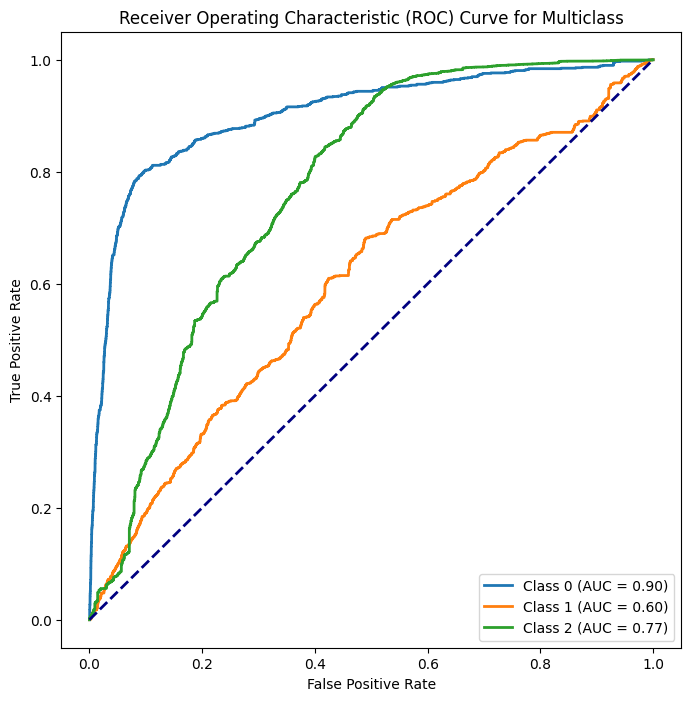

In [161]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get predicted probabilities for each class
y_prob = logreg_model.predict_proba(x_test)

# Initialize variables for ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 8))

for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()

# svm model


In [175]:
# Create an SVM model
svm_model = SVC()

# Train the model on the training set
svm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred3 = svm_model.predict(x_test)


In [176]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred3)
classification_report_result = classification_report(y_test, y_pred3)
conf_matrix = confusion_matrix(y_test, y_pred3)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7463135428793171

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1188
           1       0.00      0.00      0.00      1427
           2       0.75      1.00      0.85      7693

    accuracy                           0.75     10308
   macro avg       0.25      0.33      0.28     10308
weighted avg       0.56      0.75      0.64     10308


Confusion Matrix:
 [[   0    0 1188]
 [   0    0 1427]
 [   0    0 7693]]


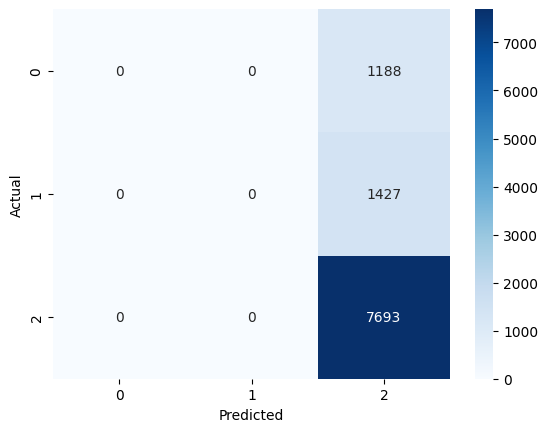

In [177]:
# Display results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_result)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

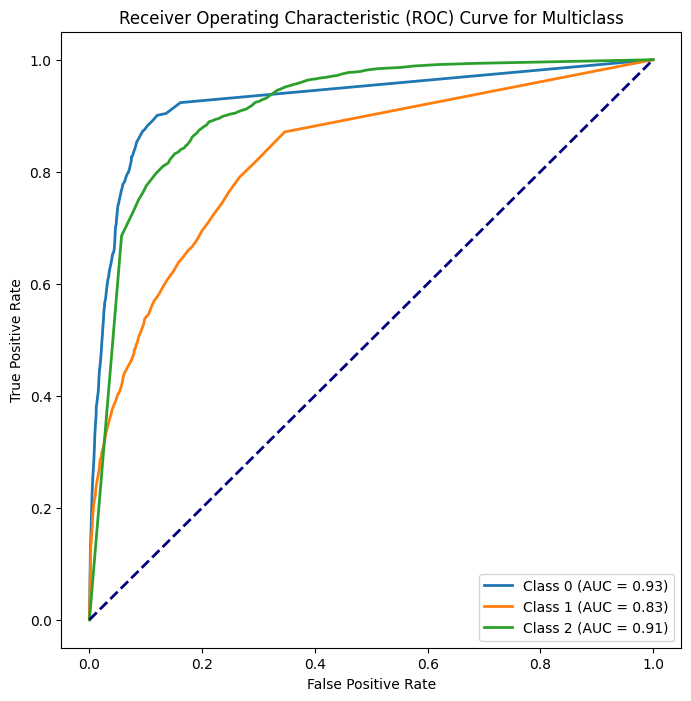

In [163]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get predicted probabilities for each class
y_prob = rf_model.predict_proba(x_test)

# Initialize variables for ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 8))

for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()

Artifical Neural Network

In [167]:
# Build the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=4, verbose=2)

# Evaluate the model
y_pred = (model.predict(x_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
accuracy_score(y_test,y_pred)

Epoch 1/10
10307/10307 - 20s - loss: -1.5327e+09 - accuracy: 0.1340 - 20s/epoch - 2ms/step
Epoch 2/10
10307/10307 - 19s - loss: -1.5662e+10 - accuracy: 0.1340 - 19s/epoch - 2ms/step
Epoch 3/10
10307/10307 - 19s - loss: -5.6005e+10 - accuracy: 0.1340 - 19s/epoch - 2ms/step
Epoch 4/10
10307/10307 - 19s - loss: -1.3511e+11 - accuracy: 0.1340 - 19s/epoch - 2ms/step
Epoch 5/10
10307/10307 - 18s - loss: -2.6446e+11 - accuracy: 0.1340 - 18s/epoch - 2ms/step
Epoch 6/10
10307/10307 - 19s - loss: -4.5773e+11 - accuracy: 0.1340 - 19s/epoch - 2ms/step
Epoch 7/10
10307/10307 - 18s - loss: -7.2522e+11 - accuracy: 0.1340 - 18s/epoch - 2ms/step
Epoch 8/10
10307/10307 - 19s - loss: -1.0786e+12 - accuracy: 0.1340 - 19s/epoch - 2ms/step
Epoch 9/10
10307/10307 - 19s - loss: -1.5309e+12 - accuracy: 0.1340 - 19s/epoch - 2ms/step
Epoch 10/10
10307/10307 - 18s - loss: -2.0921e+12 - accuracy: 0.1340 - 18s/epoch - 2ms/step
323/323 [==============================] - 1s 2ms/step


0.1384361660845945


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1188
           1       0.00      0.00      0.00      1427
           2       0.75      1.00      0.85      7693

    accuracy                           0.75     10308
   macro avg       0.25      0.33      0.28     10308
weighted avg       0.56      0.75      0.64     10308


Confusion Matrix:
 [[   0    0 1188]
 [   0    0 1427]
 [   0    0 7693]]


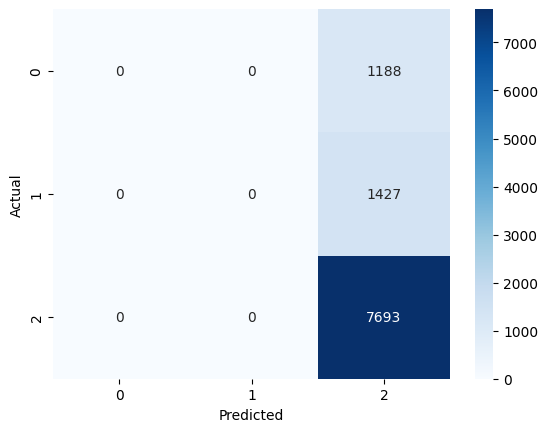

In [140]:
print("\nClassification Report:\n", classification_report_result)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

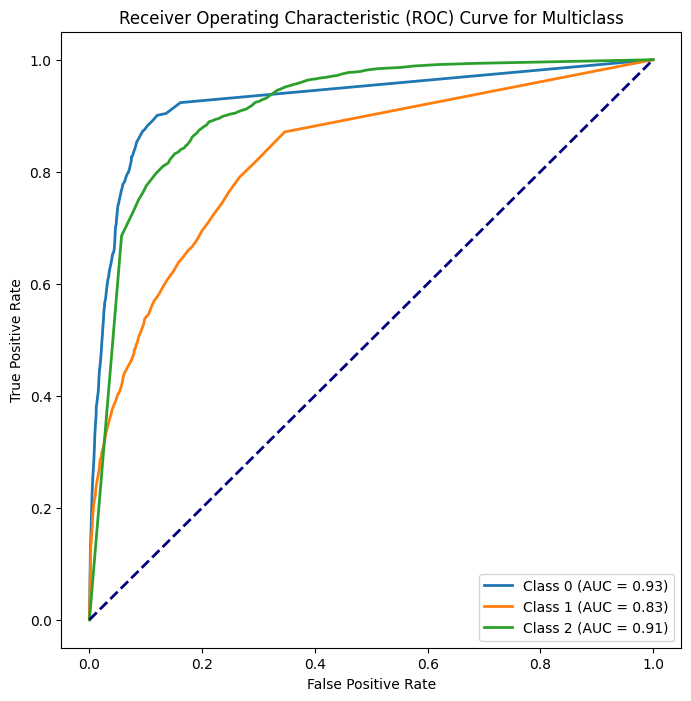

In [172]:
from tensorflow.keras.utils import to_categorical
# Initialize variables for ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Convert multiclass labels to binary format
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
num_classes = 3
# Compute ROC curve and ROC area for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 8))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()

# random forest

In [178]:
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred4 = rf_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred4)
classification_report_result = classification_report(y_test, y_pred4)
conf_matrix = confusion_matrix(y_test, y_pred4)
print("Accuracy:", accuracy)

Accuracy: 0.8234381063251843



Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.67      0.66      1188
           1       0.50      0.47      0.48      1427
           2       0.90      0.91      0.91      7693

    accuracy                           0.82     10308
   macro avg       0.69      0.68      0.68     10308
weighted avg       0.82      0.82      0.82     10308


Confusion Matrix:
 [[ 791  209  188]
 [ 205  664  558]
 [ 200  460 7033]]


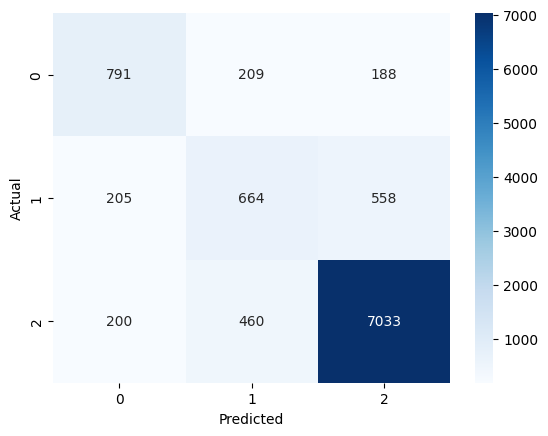

In [179]:
# Display results
print("\nClassification Report:\n", classification_report_result)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

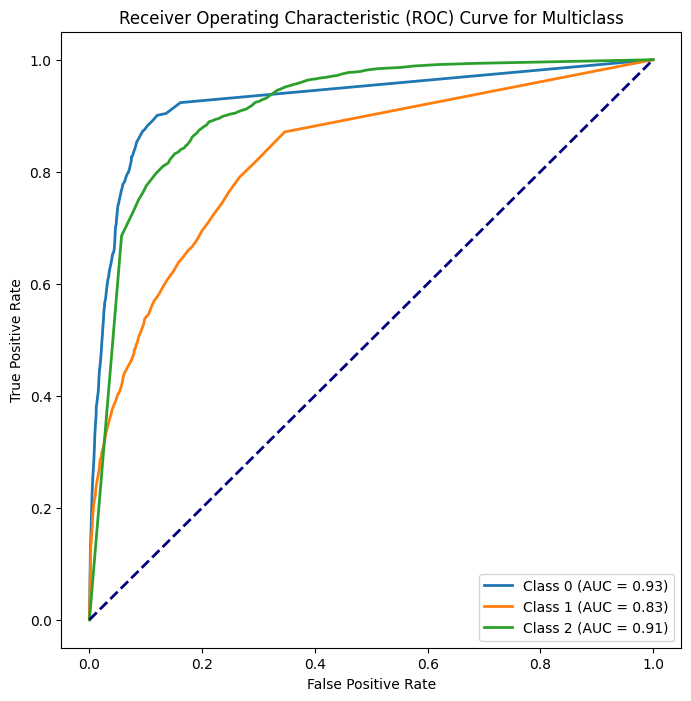

In [149]:
# Binarize the labels for each class
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get predicted probabilities for each class
y_prob = rf_model.predict_proba(x_test)

# Initialize variables for ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 8))

for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()

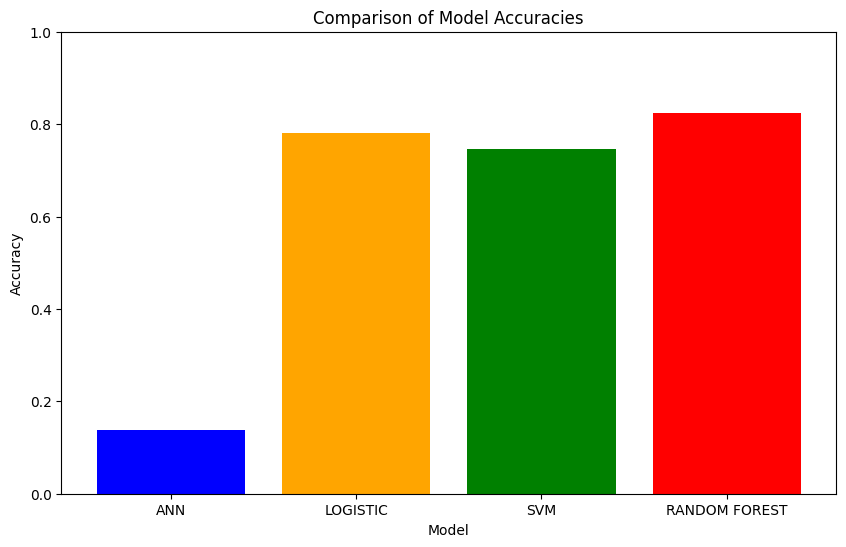

In [181]:
# Compute accuracies
accuracy1 = accuracy_score(y_test, y_pred)
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy3 = accuracy_score(y_test, y_pred3)
accuracy4 = accuracy_score(y_test, y_pred4)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
models_names = ['ANN', 'LOGISTIC', 'SVM', 'RANDOM FOREST']
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4]
plt.bar(models_names, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for accuracy percentages
plt.show()